# 1. Problem statement
   1. To what extent can structured Airbnb data support decision-making frameworks for tourism planning?
   2. What analytical frameworks are most suitable for leveraging Airbnb Big Data in strategic tourism planning?
   3. How can structured data from Airbnb listings inform the adaptation of prescriptive models for demand   forecasting and host behavior analysis in tourism destinations?
   4. Can forecasting models built on Airbnb data from one city be applied effectively to other cities for strategic tourism planning?

# 2. Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from datetime import datetime

from sklearn.cluster import KMeans

import sklearn.model_selection

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [78]:
pd.set_option("display.max_columns", None)

In [3]:
df_1 = pd.read_csv("C:/Users/Pc/Desktop/Thesis/PARIS/listings paris.csv", encoding="utf-8")

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84055 entries, 0 to 84054
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              84055 non-null  int64  
 1   name                            84055 non-null  object 
 2   host_id                         84055 non-null  int64  
 3   host_name                       84031 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   84055 non-null  object 
 6   latitude                        84055 non-null  float64
 7   longitude                       84055 non-null  float64
 8   room_type                       84055 non-null  object 
 9   price                           53963 non-null  float64
 10  minimum_nights                  84055 non-null  int64  
 11  number_of_reviews               84055 non-null  int64  
 12  last_review                     

In [5]:
df_2 = pd.read_csv("C:/Users/Pc/Desktop/Thesis/PARIS/listings 2 paris.csv", encoding="utf-8")

In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84055 entries, 0 to 84054
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            84055 non-null  int64  
 1   listing_url                                   84055 non-null  object 
 2   scrape_id                                     84055 non-null  int64  
 3   last_scraped                                  84055 non-null  object 
 4   source                                        84055 non-null  object 
 5   name                                          84055 non-null  object 
 6   description                                   81177 non-null  object 
 7   neighborhood_overview                         41178 non-null  object 
 8   picture_url                                   84054 non-null  object 
 9   host_id                                       84055 non-null 

In [7]:
df = df_1.merge(df_2, on="id", how="inner")

In [8]:
df.head()

,id,name_x,host_id_x,host_name_x,neighbourhood_group,neighbourhood_x,latitude_x,longitude_x,room_type_x,price_x,...,review_scores_communication,review_scores_location,review_scores_value,license_y,instant_bookable,calculated_host_listings_count_y,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month_y
0,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83191,2.31870,Entire home/apt,135.0,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.08
1,5396,Your perfect Paris studio on Île Saint-Louis,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,114.0,...,4.85,4.95,4.59,7510402838018,f,1,1,0,0,2.32
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,149.0,...,4.89,4.94,4.74,7510400829623,f,1,1,0,0,2.20
3,7964,Sunny apartment with balcony,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,NaN,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.03
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75.0,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN


# 3. DATA CLEANING

In [9]:
#Dropping duplicate columns

cols = df.columns
cols_x = [c for c in cols if c.endswith("_x")]
cols_y = [c for c in cols if c.endswith("_y")]

df = df.drop(columns= cols_x)

rename_dict = {col: col.replace("_y", "") for col in cols_y}
df = df.rename(columns=rename_dict)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84055 entries, 0 to 84054
Data columns (total 80 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            84055 non-null  int64  
 1   neighbourhood_group                           0 non-null      float64
 2   listing_url                                   84055 non-null  object 
 3   scrape_id                                     84055 non-null  int64  
 4   last_scraped                                  84055 non-null  object 
 5   source                                        84055 non-null  object 
 6   name                                          84055 non-null  object 
 7   description                                   81177 non-null  object 
 8   neighborhood_overview                         41178 non-null  object 
 9   picture_url                                   84054 non-null 

In [11]:
#Dropping columns that all values are null 

df_clean = df.dropna(axis=1, how="all")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84055 entries, 0 to 84054
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            84055 non-null  int64  
 1   listing_url                                   84055 non-null  object 
 2   scrape_id                                     84055 non-null  int64  
 3   last_scraped                                  84055 non-null  object 
 4   source                                        84055 non-null  object 
 5   name                                          84055 non-null  object 
 6   description                                   81177 non-null  object 
 7   neighborhood_overview                         41178 non-null  object 
 8   picture_url                                   84054 non-null  object 
 9   host_id                                       84055 non-null 

In [12]:
#Dropping columns that contain no meaningful values

df_cleaned = df_clean.drop(columns=["neighbourhood", "source", "listing_url",
                                    "host_thumbnail_url", "scrape_id", "last_scraped", "calendar_last_scraped", 
                                    "bathrooms", "last_review", "license"], axis=1)

In [13]:
#1st Checking missing values

missing_info = df_cleaned.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(df_cleaned)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                             Missing count  Missing %
host_neighbourhood                   55140  65.599905
host_about                           46647  55.495806
neighborhood_overview                42877  51.010648
host_response_time                   31392  37.346975
host_response_rate                   31392  37.346975
estimated_revenue_l365d              30092  35.800369
price                                30092  35.800369
beds                                 30048  35.748022
host_acceptance_rate                 26142  31.101065
review_scores_checkin                19576  23.289513
review_scores_value                  19576  23.289513
review_scores_location               19575  23.288323
review_scores_accuracy               19569  23.281185
review_scores_communication          19567  23.278806
review_scores_cleanliness            19566  23.277616
review_scores_rating                 19557  23.266909
first_review                         19557  23.266909
reviews_per_month           

In [14]:
df_cleaned.head()

,id,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, France",...,5.00,5.00,5.00,5.00,f,1,1,0,0,0.08
1,5396,Your perfect Paris studio on Île Saint-Louis,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"Paris, France",...,4.81,4.85,4.95,4.59,f,1,1,0,0,2.32
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,https://www.airbnb.com/users/show/2626,Franck,2008-08-30,"Paris, France",...,4.92,4.89,4.94,4.74,f,1,1,0,0,2.20
3,7964,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,https://www.airbnb.com/users/show/22155,Anaïs,2009-06-18,"Paris, France",...,5.00,5.00,5.00,5.00,f,1,1,0,0,0.03
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,https://www.airbnb.com/users/show/28422,Bernadette,2009-07-29,"New York, NY",...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [15]:
#Converting categorical features into numerical according to its context for better management 

binary_columns = [
    
    "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "has_availability", "instant_bookable"
]

for col in binary_columns:
    df_cleaned[col] = df_cleaned[col].map({"t": 1, "f":0, "yes":1, "no":0})
    
percentage_columns = ["host_response_rate", "host_acceptance_rate"]

for col in percentage_columns:
    df_cleaned[col] = df_cleaned[col].str.rstrip("%").astype("float") / 100
    
df_cleaned["price"] = df_cleaned["price"].replace("[/$,]", "", regex=True).astype(float)


import re

def extract_bathrooms(text):
    if isinstance(text, str):
        match = re.search(r"([\d\.]+)", text)
        return float(match.group(1)) if match else None
    return None

df_cleaned["bathrooms_text"] = df_cleaned["bathrooms_text"].apply(extract_bathrooms)

In [16]:
df_cleaned.head()

,id,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, France",...,5.00,5.00,5.00,5.00,0,1,1,0,0,0.08
1,5396,Your perfect Paris studio on Île Saint-Louis,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"Paris, France",...,4.81,4.85,4.95,4.59,0,1,1,0,0,2.32
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,https://www.airbnb.com/users/show/2626,Franck,2008-08-30,"Paris, France",...,4.92,4.89,4.94,4.74,0,1,1,0,0,2.20
3,7964,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,https://www.airbnb.com/users/show/22155,Anaïs,2009-06-18,"Paris, France",...,5.00,5.00,5.00,5.00,0,1,1,0,0,0.03
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,https://www.airbnb.com/users/show/28422,Bernadette,2009-07-29,"New York, NY",...,NaN,NaN,NaN,NaN,0,1,1,0,0,NaN


In [18]:
#Handling missing values in numerical features

numerical_columns = ["beds", "bedrooms", "price", "estimated_revenue_l365d", "bathrooms_text"]

for col in numerical_columns:
    df_cleaned[col].fillna(df_cleaned[col].median())
    
    
#target feature (different treatment)    
    
df_cleaned["reviews_per_month"].fillna(0.0)



review_score_columns = [   
    "review_scores_value", "review_scores_location", "review_scores_checkin", "review_scores_communication",
    "review_scores_accuracy", "review_scores_cleanliness", "review_scores_rating"    
]

for col in review_score_columns:
    df_cleaned[col].fillna(0.0)
    
    

df_cleaned["has_availability"].fillna(df_cleaned["has_availability"].mode()[0])


low_missing_columns = [
    "host_listings_count", "host_total_listings_count", "host_response_rate", "host_is_superhost", 
    "host_has_profile_pic", "host_identity_verified", "host_acceptance_rate"
]

for col in low_missing_columns:
    df_cleaned[col].fillna(df_cleaned[col].median(),)

In [19]:
#2nd Checking missing values

missing_info = df_cleaned.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(df_cleaned)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                       Missing count  Missing %
host_neighbourhood             55140  65.599905
host_about                     46647  55.495806
neighborhood_overview          42877  51.010648
host_response_time             31392  37.346975
first_review                   19557  23.266909
host_location                  17179  20.437809
description                     2878   3.423949
host_since                        26   0.030932
host_picture_url                  26   0.030932
host_verifications                26   0.030932
host_name                         24   0.028553
picture_url                        1   0.001190


In [20]:
#Categorical features - handling missing values

df_cleaned["new_neighborhood_overview"] = df_cleaned["neighborhood_overview"].notna().astype(int)
df_cleaned["new_host_about"] = df_cleaned["host_about"].notna().astype(int)
df_cleaned["new_description"] = df_cleaned["description"].notna().astype(int)
df_cleaned["new_host_picture_url"] = df_cleaned["host_picture_url"].notna().astype(int)
df_cleaned["new_picture_url"] = df_cleaned["picture_url"].notna().astype(int)

clean_cat_df = df_cleaned.drop(columns=["neighborhood_overview", "host_about", "description", "host_picture_url",
                                         "picture_url"], axis=1)

In [21]:
#3rd Checking missing values

missing_info = clean_cat_df.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(clean_cat_df)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

                    Missing count  Missing %
host_neighbourhood          55140  65.599905
host_response_time          31392  37.346975
first_review                19557  23.266909
host_location               17179  20.437809
host_since                     26   0.030932
host_verifications             26   0.030932
host_name                      24   0.028553


In [23]:
categorical_columns = [
    "host_neighbourhood", "host_location", "host_name", "host_verifications", "host_response_time"
]


for col in categorical_columns:
    clean_cat_df[col].fillna("missing")

In [24]:
#4th Checking missing values

missing_info = clean_cat_df.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(clean_cat_df)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

              Missing count  Missing %
first_review          19557  23.266909
host_since               26   0.030932


In [25]:
#handling missing values related to date columns

clean_cat_df["first_review"] = pd.to_datetime(clean_cat_df["first_review"], errors="coerce")

clean_cat_df["first_review"] = clean_cat_df["first_review"].notna().astype(int)

clean_cat_df["host_since"] = pd.to_datetime(clean_cat_df["host_since"], errors="coerce")
new_df = clean_cat_df.dropna(subset=["host_since"])

In [26]:
#5th Checking missing values

missing_info = new_df.isnull().sum().to_frame(name="Missing count")
missing_info["Missing %"] = (missing_info["Missing count"] / len(new_df)) * 100
missing_info = missing_info[missing_info["Missing count"] > 0].sort_values (by="Missing %", ascending=False)

print(missing_info)

Empty DataFrame
Columns: [Missing count, Missing %]
Index: []


In [27]:
new_df.describe()

,id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,new_neighborhood_overview,new_host_about,new_description,new_host_picture_url,new_picture_url
count,8.402900e+04,8.402900e+04,84029,84029.000000,84029.000000,84029.000000,84029.000000,84029.000000,84029.000000,84029.000000,...,84029.000000,84029.000000,84029.000000,84029.000000,84029.000000,84029.000000,84029.000000,84029.000000,84029.0,84029.000000
mean,6.348482e+17,1.857916e+08,2017-07-22 15:14:57.504433152,0.948094,0.859944,0.204620,31.938843,41.159861,0.965690,0.904235,...,25.377203,24.200109,1.044342,0.014590,0.802133,0.489950,0.445180,0.965750,1.0,0.999988
min,3.109000e+03,2.750000e+02,2008-04-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,3.150739e+07,1.948494e+07,2014-08-17 00:00:00,1.000000,0.880000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.020000,0.000000,0.000000,1.000000,1.0,1.000000
50%,8.318296e+17,7.315256e+07,2016-05-26 00:00:00,1.000000,0.970000,0.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.290000,0.000000,0.000000,1.000000,1.0,1.000000
75%,1.118822e+18,3.389546e+08,2020-02-26 00:00:00,1.000000,1.000000,0.000000,4.000000,6.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,0.000000,1.050000,1.000000,1.000000,1.000000,1.0,1.000000
max,1.437099e+18,7.007037e+08,2025-06-11 00:00:00,1.000000,1.000000,1.000000,7954.000000,8721.000000,1.000000,1.000000,...,835.000000,835.000000,166.000000,9.000000,67.160000,1.000000,1.000000,1.000000,1.0,1.000000
std,5.402607e+17,2.076567e+08,NaN,0.176516,0.252683,0.403426,120.838795,157.249944,0.182024,0.294270,...,97.958379,96.296891,10.728891,0.259262,1.262585,0.499902,0.496989,0.181872,0.0,0.003450


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84029 entries, 0 to 84054
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            84029 non-null  int64         
 1   name                                          84029 non-null  object        
 2   host_id                                       84029 non-null  int64         
 3   host_url                                      84029 non-null  object        
 4   host_name                                     84029 non-null  object        
 5   host_since                                    84029 non-null  datetime64[ns]
 6   host_location                                 84029 non-null  object        
 7   host_response_time                            84029 non-null  object        
 8   host_response_rate                            84029 non-null  float64  

# DATA PREPROCESSING

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84029 entries, 0 to 84054
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            84029 non-null  int64         
 1   name                                          84029 non-null  object        
 2   host_id                                       84029 non-null  int64         
 3   host_url                                      84029 non-null  object        
 4   host_name                                     84029 non-null  object        
 5   host_since                                    84029 non-null  datetime64[ns]
 6   host_location                                 84029 non-null  object        
 7   host_response_time                            84029 non-null  object        
 8   host_response_rate                            84029 non-null  float64  

In [30]:
# 1st Feature engineering section - column 0 to 10 

#dropping id, host_id, host_url, host_name - features with unique identifier

first_df = new_df.drop(columns=["id", "host_id", "host_url", "host_name"])

#host_since: extracting the amount of time that a host is in the platform

first_df["host_since"] = pd.to_datetime(first_df["host_since"], errors="coerce")
first_df["host_tenure_days"] = (datetime.now() - first_df["host_since"]).dt.days

#host_location: as the information is disperse it will be extracted if the host is from UK (Airbnb location) or not 
# 1 = Host is in UK; 0 = Host is not in the UK; -1 = Host location info is missing 

first_df["host_is_local"] = first_df["host_location"].apply(
    lambda x: 1 if isinstance(x,str) and "United Kingdom" in x else(0 if isinstance(x,str) else -1)
)

second_df = first_df.drop(columns=["host_location"])

In [31]:
second_df.head(20)

,name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,new_neighborhood_overview,new_host_about,new_description,new_host_picture_url,new_picture_url,host_tenure_days,host_is_local
0,zen and calm,2008-10-14,within an hour,1.00,1.00,0.0,Alésia,1.0,1.0,"['email', 'phone']",...,0,0,0.08,1,0,1,1,1,6148,0
1,Your perfect Paris studio on Île Saint-Louis,2009-02-14,within an hour,1.00,0.95,0.0,Saint-Paul - Ile Saint-Louis,2.0,4.0,"['email', 'phone']",...,0,0,2.32,1,1,1,1,1,6025,0
2,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2008-08-30,within an hour,1.00,0.67,1.0,Le Marais,1.0,10.0,"['email', 'phone']",...,0,0,2.20,0,1,1,1,1,6193,0
3,Sunny apartment with balcony,2009-06-18,missing,1.00,0.97,0.0,Gare du Nord - Gare de I'Est,1.0,1.0,['phone'],...,0,0,0.03,0,1,1,1,1,5901,0
4,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",2009-07-29,missing,1.00,0.97,0.0,Châtelet - Les Halles - Beaubourg,2.0,4.0,"['email', 'phone']",...,0,0,0.00,0,1,1,1,1,5860,0
5,Elegant appartment in Montmartre,2009-09-28,within an hour,1.00,1.00,0.0,Montmartre,1.0,1.0,"['email', 'phone']",...,0,0,0.32,1,1,1,1,1,5799,0
6,"Heart of Paris, brand new aparment.",2009-10-01,within a few hours,1.00,0.88,1.0,République,1.0,2.0,"['email', 'phone']",...,0,0,0.10,1,1,1,1,1,5796,0
7,Amazing Loft in Paris,2009-10-08,within a few hours,1.00,0.75,0.0,Place d'Italie - Quartier Chinois,1.0,1.0,"['email', 'phone']",...,0,0,0.78,1,1,1,1,1,5789,0
8,Faubourg Saint Antoine-chambrecalme,2009-10-20,missing,1.00,0.97,0.0,XI Arrondissement,1.0,3.0,"['email', 'phone']",...,1,0,0.01,0,1,0,1,1,5777,0
9,Voltaire Charm,2009-10-28,within an hour,1.00,1.00,0.0,XI Arrondissement,1.0,3.0,['phone'],...,0,0,0.73,1,1,1,1,1,5769,0


In [32]:
# 2nd Feature engineering section

#Price feature - creating price per guest

second_df["price_per_guest"] = second_df.apply(
    lambda row: round(row["price"] / row["accommodates"], 2) if row ["accommodates"] 
    and row["accommodates"]> 0 else round(row['price'], 2), axis=1
)

#Latitude and longitud - creating clusters for better understanding 

coords = second_df[["latitude", "latitude"]]

k = 20
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
second_df["location_cluster"] = kmeans.fit_predict(second_df[["latitude", "latitude"]])

#Minimum_nights - creating bins to categorize 

def categorize_min_nights(n):
    if n<= 3:
        return "short_stay"
    elif n<=14:
        return "mid_stay"
    else:
        return "long_stay"
    
second_df["min_nights_category"] = second_df["minimum_nights"].apply(categorize_min_nights)

#dropping engineered features:

third_df = second_df.drop(columns=["latitude", "latitude", "price", "accommodates", "minimum_nights", ])

In [33]:
# 3rd Feature engineering section

#Amenities

import ast

third_df["amenities_list"] = third_df["amenities"].apply(ast.literal_eval)

third_df["amenities_count"] = third_df["amenities_list"].apply(len)

key_amenities = [
    "Wifi", "Kitchen", "Heating", "Washer", "Air conditioning", "Cooking basics", "Air conditioning", "TV",
    "Elevator", "First aid kit", "Smoke alarm", "Self check-in", "Essentials"
]

for amenity in key_amenities:
    third_df[f"amenity_{amenity.lower().replace(' ', '_')}"] = third_df["amenities_list"].apply(
        lambda x: 1 if amenity in x else 0)

    
#Maximum_nights 

max_night_cap = 365

third_df["maximum_nights_capped"] = third_df["maximum_nights"].apply(lambda x: min(x, max_night_cap))
    
#dropping features non needed

fourth_df = third_df.drop(columns=["amenities", "amenities_list", "maximum_nights"])

In [34]:
# 4th Feature engineering section

#in this section some columns that contain redundant information will be dropped

fifth_df = fourth_df.drop(columns=["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights",
                                  "maximum_maximum_nights", "availability_60", "availability_90"])

In [35]:
fifth_df.head()

,name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,amenity_washer,amenity_air_conditioning,amenity_cooking_basics,amenity_tv,amenity_elevator,amenity_first_aid_kit,amenity_smoke_alarm,amenity_self_check-in,amenity_essentials,maximum_nights_capped
0,zen and calm,2008-10-14,within an hour,1.0,1.00,0.0,Alésia,1.0,1.0,"['email', 'phone']",...,1,0,1,0,0,0,1,1,0,30
1,Your perfect Paris studio on Île Saint-Louis,2009-02-14,within an hour,1.0,0.95,0.0,Saint-Paul - Ile Saint-Louis,2.0,4.0,"['email', 'phone']",...,1,0,1,0,0,1,1,0,1,365
2,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2008-08-30,within an hour,1.0,0.67,1.0,Le Marais,1.0,10.0,"['email', 'phone']",...,0,0,1,0,0,0,1,0,1,130
3,Sunny apartment with balcony,2009-06-18,missing,1.0,0.97,0.0,Gare du Nord - Gare de I'Est,1.0,1.0,['phone'],...,0,0,1,0,0,0,0,0,1,365
4,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",2009-07-29,missing,1.0,0.97,0.0,Châtelet - Les Halles - Beaubourg,2.0,4.0,"['email', 'phone']",...,0,0,0,0,1,0,0,0,1,360


reviews_per_month                               1.000000
number_of_reviews_ltm                           0.832203
number_of_reviews_l30d                          0.733672
number_of_reviews_ly                            0.714552
estimated_occupancy_l365d                       0.709707
number_of_reviews                               0.581853
review_scores_cleanliness                       0.358347
review_scores_location                          0.350879
review_scores_communication                     0.350232
review_scores_rating                            0.349488
review_scores_checkin                           0.349459
review_scores_value                             0.348642
review_scores_accuracy                          0.347438
host_is_superhost                               0.299267
amenity_self_check-in                           0.264247
estimated_revenue_l365d                         0.246843
amenities_count                                 0.240390
amenity_cooking_basics         

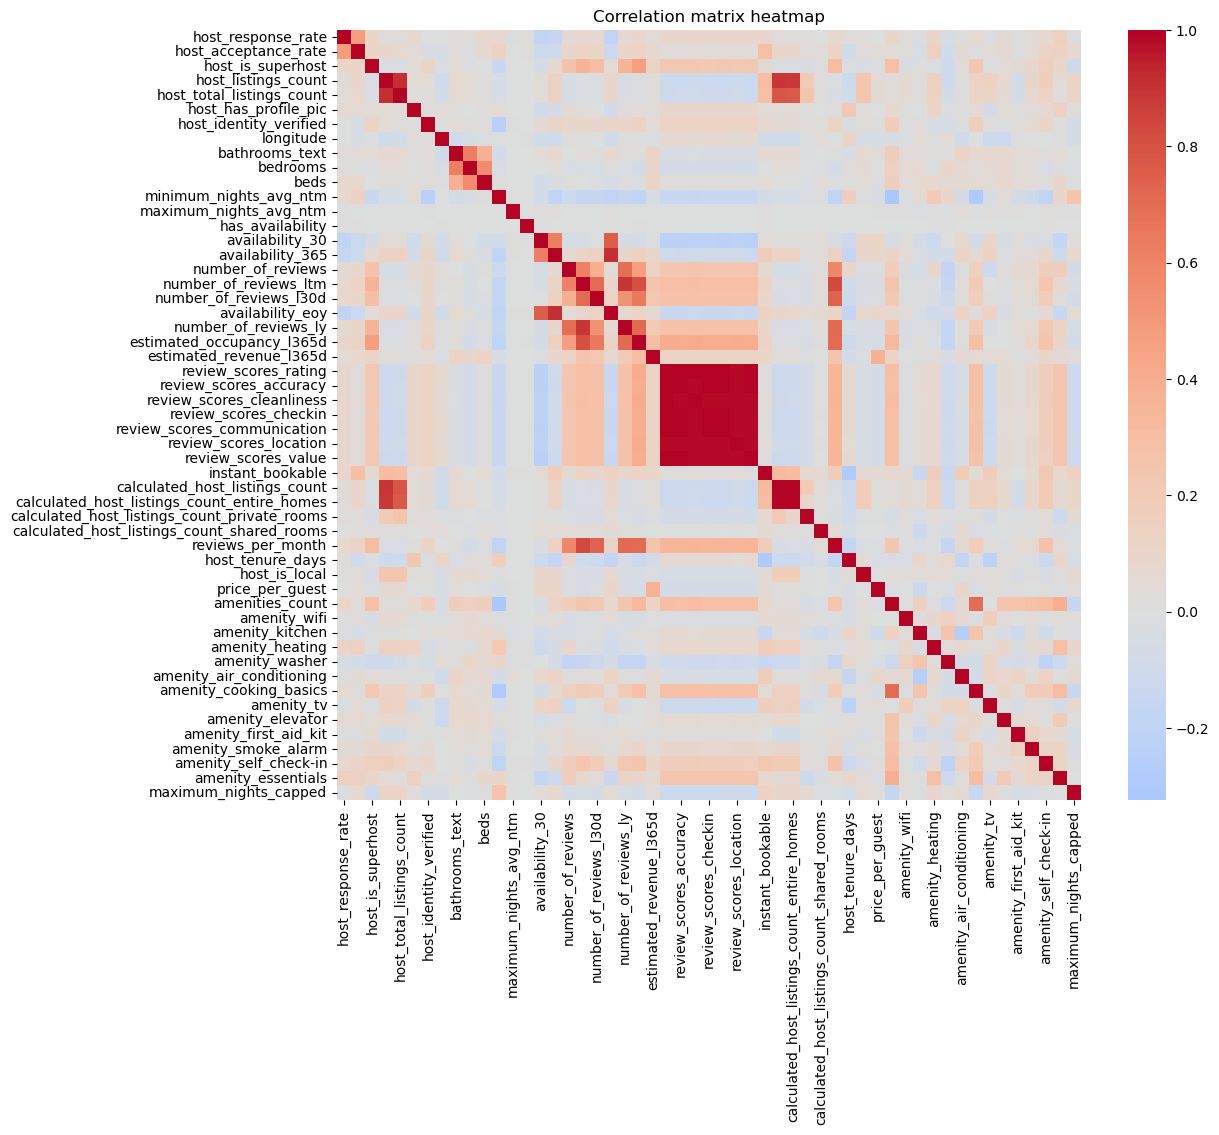

In [36]:
# Evaluation of the correlation among features in order to drop features that are not relevant for the target

numeric_cols = fifth_df.select_dtypes(include=["float64", "int64"]).columns

corr_matrix = fifth_df[numeric_cols].corr()

target_corr = corr_matrix["reviews_per_month"].sort_values(ascending=False)
print(target_corr)

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation matrix heatmap")
plt.show()

In [37]:
#Defining low correlated features and dropping = features with below 0.01

low_correlated_features = [
    
    "new_picture_url","has_availability", "longitude", "maximum_nights_avg_ntm", "beds",
    "price_per_guest", "amenity_wifi", "amenity_heating", "amenity_elevator", 
    "calculated_host_listings_count_entire_homes", "host_listings_count", "maximum_nights_capped",
    "calculated_host_listings_count", "host_total_listings_count", "availability_30",
    "calculated_host_listings_count_private_rooms", "amenity_kitchen", "host_is_local", "bedrooms",
    "amenity_washer", "host_tenure_days", "minimum_nights_avg_ntm", "new_host_picture_url"
]

df_new = fifth_df.drop(columns=low_correlated_features, axis=1)

In [38]:
#Spltting into train and test data 


df_train, df_test = sklearn.model_selection.train_test_split(df_new, test_size=0.2)

print("fifth_df", df_new.shape)
print("df_train", df_train.shape)
print("df_test", df_test.shape)

fifth_df (84029, 46)
df_train (67223, 46)
df_test (16806, 46)


In [39]:
#Defining variables

x_train = df_train.drop("reviews_per_month", axis=1)
y_train = df_train["reviews_per_month"]
x_test = df_test.drop("reviews_per_month", axis=1)
y_test = df_test["reviews_per_month"]

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (67223, 45)
y_train (67223,)
x_test (16806, 45)
y_test (16806,)


# Feature Engineering

In [40]:
#Encoding and Normalization of data points

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_features = x_train.select_dtypes(include=["object","category"]).columns.tolist()
numerical_features = x_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
)

x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

# MODEL TRAINING

In [41]:
import sklearn.model_selection
import sklearn.ensemble

In [42]:
# 1st Experiment - Lasso Regression

from sklearn.linear_model import LassoCV
from sklearn.model_selection import ShuffleSplit

alphas = np.logspace(-3, 0, 15)
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

lasso_cv = LassoCV(alphas=alphas, cv=cv, random_state=42, max_iter=1000, verbose=True, n_jobs=-1)

lasso_cv.fit(x_train_preprocessed, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
.............................................[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 11.1min finished


LassoCV(alphas=array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
        cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.3, train_size=None),
        n_jobs=-1, random_state=42, verbose=True)

In [43]:
# 2nd Experiment - Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha": np.logspace(-4, 4, 50)
}

cv_ridge = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    cv=cv_ridge, 
    verbose=2,
    n_jobs=-1
)

ridge.fit(x_train_preprocessed, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-0...
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])},
             verbose=2)

In [44]:
# 3rd Experiment - Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

cv_rf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

param_grid = {
    "n_estimators": [50, 75, 100],
    "max_depth": [10, 20, None]
}

rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=cv_rf, 
    verbose=2,
    n_jobs=-1
)

rf.fit(x_train_preprocessed, y_train)

# printing best parameters
rf_best = rf.best_estimator_
print(" Best Parameters:", rf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
 Best Parameters: {'max_depth': 20, 'n_estimators': 100}


In [45]:
# 4th Experiment - Support Vector Regression (SVR)

from sklearn.svm import LinearSVR

linear_svr = LinearSVR(C=0.5, epsilon=0.2, random_state=42, tol=1e-2, max_iter=5000)

linear_svr.fit(x_train_preprocessed, y_train)

LinearSVR(C=0.5, epsilon=0.2, max_iter=5000, random_state=42, tol=0.01)

In [46]:
# 5th Experiment - XGBoost

from xgboost import XGBRegressor

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.7, 1.0],
    "colsample_bytree": [0.7, 1.0],
}

cv_xgb = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

xgb = XGBRegressor(
    n_jobs=-1,
    verbosity=1,
    random_state=42,
    tree_method="hist"
)

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=cv_xgb,
    verbose=2,
    n_jobs=-1
)

xgb_grid.fit(x_train_preprocessed, y_train)

xgb_best = xgb_grid.best_estimator_
print("Best Parameters:", xgb_grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}


# 7. Model Evaluation

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_report(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Regression metrics report:")
    print(f" Mean Squared Error (MSE): {mse:.4f}")
    print(f" Mean Absolute Error (MAE): {mae:.4f}")
    print(f" R2 Score: {r2:.4f}")

    return {"MSE": mse, "MAE":mae, "R2": r2}

In [48]:
# 1st Experiment Evaluation - Lasso Regression

y_pred_lasso = lasso_cv.predict(x_test_preprocessed)
regression_report(y_test, y_pred_lasso)

Regression metrics report:
 Mean Squared Error (MSE): 0.3568
 Mean Absolute Error (MAE): 0.3325
 R2 Score: 0.7980


{'MSE': 0.35683916820370154,
 'MAE': 0.33251571913231237,
 'R2': 0.7980383317178313}

In [49]:
# 2nd Experiment Evaluation - Ridge Regression

y_pred_ridge = ridge.predict(x_test_preprocessed)
regression_report(y_test, y_pred_ridge)

Regression metrics report:
 Mean Squared Error (MSE): 0.3540
 Mean Absolute Error (MAE): 0.3342
 R2 Score: 0.7996


{'MSE': 0.3539942376255844,
 'MAE': 0.33424201679159204,
 'R2': 0.7996484882726619}

In [50]:
# 3rd Experiment Evaluation - Random Forest Regression

y_pred_rf = rf_best.predict(x_test_preprocessed)
regression_report(y_test, y_pred_rf)

Regression metrics report:
 Mean Squared Error (MSE): 0.2200
 Mean Absolute Error (MAE): 0.1368
 R2 Score: 0.8755


{'MSE': 0.2200182290395978,
 'MAE': 0.13675726348287756,
 'R2': 0.8754754170821304}

In [51]:
# 4th Experiment Evaluation - Support Vector Regression (SVR)

y_pred_svr = linear_svr.predict(x_test_preprocessed)
regression_report(y_test, y_pred_svr)

Regression metrics report:
 Mean Squared Error (MSE): 0.3570
 Mean Absolute Error (MAE): 0.3224
 R2 Score: 0.7980


{'MSE': 0.3569781126190079,
 'MAE': 0.32237953473454645,
 'R2': 0.7979596928003183}

In [52]:
# 5th Experiment Evaluation - XGBoost

from xgboost import XGBRegressor

y_pred_xgb = xgb_best.predict(x_test_preprocessed)
regression_report(y_test, y_pred_xgb)

Regression metrics report:
 Mean Squared Error (MSE): 0.2141
 Mean Absolute Error (MAE): 0.1527
 R2 Score: 0.8788


{'MSE': 0.21409177019137796,
 'MAE': 0.15273432101700596,
 'R2': 0.8788296383185974}